In [80]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,BatchNormalization,Dropout
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt




In [81]:
dataset_train = tf.keras.utils.image_dataset_from_directory(
    "../Dataset/Train",
    image_size=(224,224),
    batch_size=32
)

Found 8000 files belonging to 2 classes.


In [82]:
dataset_test= tf.keras.utils.image_dataset_from_directory(
    "../Dataset/Test",
    image_size=(224,224),
    batch_size=32
)

Found 2000 files belonging to 2 classes.


### Normilize 

In [83]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

dataset_train = dataset_train.map(lambda x,y: (normalization_layer(x), y))
dataset_test  = dataset_test.map(lambda x,y: (normalization_layer(x), y))

In [84]:
### Build CNN Model 
model=Sequential()

In [85]:
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

In [86]:
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

In [87]:
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

In [88]:
model.add(Flatten())


In [89]:
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [90]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 batch_normalization_19 (Bat  (None, 222, 222, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_20 (Bat  (None, 109, 109, 64)     256       
 chNormalization)                                                
                                                      

## Compile the Model

In [91]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [92]:
model.fit(dataset_train,epochs=10,validation_data=dataset_test)

Epoch 1/10
250/250 [==============================] - 19s 73ms/step - loss: 2.3877 - accuracy: 0.5440 - val_loss: 0.7607 - val_accuracy: 0.5610
Epoch 2/10
250/250 [==============================] - 18s 73ms/step - loss: 0.7495 - accuracy: 0.5608 - val_loss: 0.6932 - val_accuracy: 0.5845
Epoch 3/10
250/250 [==============================] - 18s 72ms/step - loss: 0.6591 - accuracy: 0.6186 - val_loss: 0.6293 - val_accuracy: 0.6460
Epoch 4/10
250/250 [==============================] - 18s 73ms/step - loss: 0.6233 - accuracy: 0.6576 - val_loss: 0.6648 - val_accuracy: 0.5950
Epoch 5/10
250/250 [==============================] - 18s 72ms/step - loss: 0.5918 - accuracy: 0.6706 - val_loss: 0.5848 - val_accuracy: 0.6825
Epoch 6/10
250/250 [==============================] - 18s 73ms/step - loss: 0.5455 - accuracy: 0.7044 - val_loss: 0.6088 - val_accuracy: 0.6900
Epoch 7/10
250/250 [==============================] - 19s 74ms/step - loss: 0.5011 - accuracy: 0.7315 - val_loss: 0.5348 - val_accuracy:

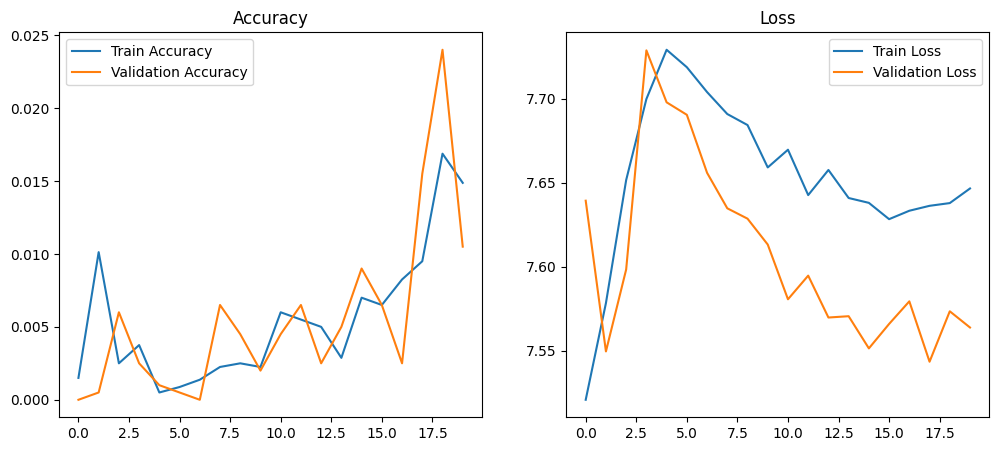

In [93]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")

plt.show()

### Reduce Overfit

In [94]:
model=Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D())


In [95]:
# Block 2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

In [96]:
# Block 3
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

In [97]:
# Block 4
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())


In [98]:
# Fully connected
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 batch_normalization_22 (Bat  (None, 222, 222, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_23 (Bat  (None, 109, 109, 64)     256       
 chNormalization)                                                
                                                      

In [101]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

### Compile the model

In [102]:
model.fit(
    dataset_train,
    epochs=15,
    validation_data=dataset_test
)

Epoch 1/15


250/250 [==============================] - 20s 77ms/step - loss: 3.1120 - accuracy: 0.5245 - val_loss: 0.6867 - val_accuracy: 0.5685
Epoch 2/15
250/250 [==============================] - 19s 77ms/step - loss: 0.8358 - accuracy: 0.5468 - val_loss: 0.6831 - val_accuracy: 0.5655
Epoch 3/15
250/250 [==============================] - 19s 77ms/step - loss: 0.6894 - accuracy: 0.5893 - val_loss: 0.6546 - val_accuracy: 0.6590
Epoch 4/15
250/250 [==============================] - 19s 77ms/step - loss: 0.6423 - accuracy: 0.6334 - val_loss: 0.5995 - val_accuracy: 0.6865
Epoch 5/15
250/250 [==============================] - 19s 77ms/step - loss: 0.6120 - accuracy: 0.6691 - val_loss: 0.5936 - val_accuracy: 0.6760
Epoch 6/15
250/250 [==============================] - 19s 77ms/step - loss: 0.5787 - accuracy: 0.6944 - val_loss: 0.5648 - val_accuracy: 0.7135
Epoch 7/15
250/250 [==============================] - 19s 77ms/step - loss: 0.5594 - accuracy: 0.7190 - val_loss: 0.5456 - val_accuracy: 0.7285
Epo

In [103]:
import numpy as np
from tensorflow.keras.preprocessing import image

# use correct filename
path = "../Dataset/Test/cats/cat.4001.jpg"

img = image.load_img(path, target_size=(224,224))

img_array = image.img_to_array(img)

img_array = np.expand_dims(img_array, axis=0) / 255.0

prediction = model.predict(img_array)

print("Prediction:", prediction)

if prediction[0][0] > 0.5:
    print("Dog 🐶")
else:
    print("Cat 🐱")

1/1 [==============================] - 0s 77ms/step
Prediction: [[0.03094803]]
Cat 🐱


In [104]:
model.save("../Model/cat_dog_model.keras")